In [ ]:
# naive baye's using creditcard

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("creditcard.csv")
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


D:\Users\dhany\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    284315
1       492
Name: Class, dtype: int64


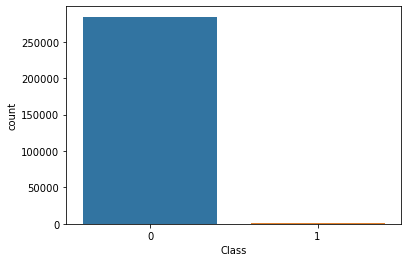

In [8]:
import seaborn as sns
sns.countplot(df['Class']) 
print(df.Class.value_counts())


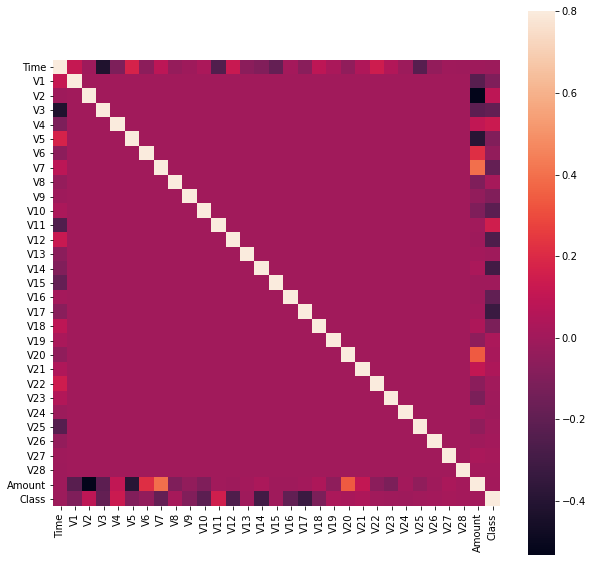

In [9]:
import matplotlib.pyplot as plt
corr_data = df.corr()
fig = plt.figure(figsize = (10, 10))
sns.heatmap(corr_data, vmax = .8, square = True)
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
target = df["Class"].values
train = df.drop(["Class"], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.3)
print("No. of training samples : ",len(x_train))
print("No. of test samples : ",len(x_test))


No. of training samples :  199364
No. of test samples :  85443


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(x_train, y_train)
classifierNB.score(x_test, y_test)
y_preds = classifierNB.predict(x_test)
print("Naive Bayes accuracy score: ",accuracy_score(y_test, y_preds))
# Confusion Matrix
cmx=confusion_matrix(y_test,y_preds)
print("\nNo. of test samples : ",len(x_test))
print("\n Confustion Matrix : \n",cmx)
print("\nPerfomance measures are: \n",classification_report(y_test, y_preds))


Naive Bayes accuracy score:  0.9929660709478834

No. of test samples :  85443

 Confustion Matrix : 
 [[84753   546]
 [   55    89]]

Perfomance measures are: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85299
           1       0.14      0.62      0.23       144

    accuracy                           0.99     85443
   macro avg       0.57      0.81      0.61     85443
weighted avg       1.00      0.99      1.00     85443



# naive baye's using iris dataset

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [28]:
data=load_iris()
df=pd.DataFrame(data.data,columns=data.feature_names)

In [29]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [30]:
print(data.feature_names)
print("\n")
df['target']=data.target

df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']




,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
import seaborn as sns
sns.countplot(df('target')).values
print(df.target.value_counts())

TypeError: 'DataFrame' object is not callable

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df[data.feature_names],df['target'])
print(len(x_train))
print(len(x_test))


112
38


In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB.fit(x_train,y_train)
classifierNB.score(x_test, y_test)
y_preds = classifierNB.predict(x_test)
print("naive baye's accuracy score: ",accuracy_score(y_test, y_preds))
# Confusion Matrix
labels=[0,1,2]
cmx=confusion_matrix(y_test,y_preds, labels)
print("\nNo. of test samples : ",len(x_test))
print("\n Confustion Matrix : \n",cmx)
print("\nPerfomance measures are: \n",classification_report(y_test, y_preds))

naive baye's accuracy score:  0.9210526315789473

No. of test samples :  38

 Confustion Matrix : 
 [[ 8  0  0]
 [ 0 12  3]
 [ 0  0 15]]

Perfomance measures are: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.92        38
   macro avg       0.94      0.93      0.93        38
weighted avg       0.93      0.92      0.92        38



D:\Users\dhany\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
